In [110]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

In [111]:
df=pd.read_csv("JobMarketData.csv")

In [112]:
df.head(10)

,Role,Companies,Location,Experience,Skills,Company Size,Eligibility Criteria,Enrollment Type,Salary,Min Salary,Max Salary,Min Experience
0,Data Scientist,2Coms,New Delhi,2 - 7 years,DataModeling\nEnterpriseApplications\nAnalytic...,838,B.Tech,Freelance,1000000-2000000,1000000,2000000,2
1,Machine Learning Engineer,2Coms,Mumbai,0-5 Yrs,Python\nComputerVision\nMachineLearning\nR\nBu...,4000,UG,Full Time,1800000-3300000,1800000,3300000,0
2,Data Scientist,2Coms Consulting Pvt Ltd.,"Chennai, Bengaluru",6-11 Yrs,Machine Learning Code DataScience R Data Model...,10000,Phd,Full Time,160000-185000,160000,185000,6
3,Machine Learning Engineer,2Coms Consulting Pvt Ltd.,"Chennai, Pune, Mumbai",3-8 Yrs,DataScience\nR\nNLP\nAlgorithms\nArtificialInt...,10000,PG/Phd,Full Time,1200000-2100000,1200000,2100000,3
4,Data Scientist,3D India Staffing Research & Consulting Co India,Bengaluru,8-13 Yrs,Team Handling\nSegmentation\nOperations Resear...,200,Phd,Full Time,5000000-1700000,5000000,1700000,8
5,Data Scientist,3D India Staffing Research & Consulting Pvt Ltd,"Gurgaon, Gurugram",3-5 Yrs,R\nLending\nSAS\nData Scientist\nHadoop\nSpark...,200,PG,Full Time,1300000-1700000,1300000,1700000,3
6,Data Scientist,3D India Staffing Research Consulting Pvt Ltd,Gurgaon,3-5 Yrs,Quantitative Analysis\nProduct Management\nLen...,200,PG,Full Time,1500000-1900000,1500000,1900000,3
7,Data Scientist,3D India Staffing Research Consulting Pvt Ltd,Gurgaon,3-6 Yrs,R\nLending\nSAS\nHadoop\nSpark\nIIM\nquantitat...,200,PG,Full Time,1400000-1900000,1400000,1900000,3
8,Data Scientist,3D India Staffing Research Consulting Pvt Ltd,"Gurgaon, Gurugram",5-9 Yrs,Data Science\nJava\nR\nArtificial Intelligence...,200,PG/Phd,Full Time,500000-800000,500000,800000,5
9,Data Scientist,3D India Staffing Research Consulting Pvt Ltd,Gurgaon,5-8 Yrs,Java\nBusiness Intelligence\nR\nETL Tools\nSCA...,200,PG/Phd,Full Time,700000-1300000,700000,1300000,5


In [113]:
df.columns

Index(['Role', 'Companies', 'Location', 'Experience', 'Skills', 'Company Size',
       'Eligibility Criteria', 'Enrollment Type', 'Salary', 'Min Salary',
       'Max Salary', 'Min Experience'],
      dtype='object')

In [114]:
df["Role"].unique()

array(['Data Scientist', 'Machine Learning Engineer', 'Data Engineer',
       'Applied Scientist (Machine Learning)', 'For Data Scientist',
       'Data Analyst', 'Elastic Path Solutions Application Developer',
       'Machine Learning Data Science Practitioner',
       'SAP BusinessObjects Data Services Application Developer',
       'Artificial Intelligence Scientist',
       'Trainee-freshers-machine Learning-ai-data Scientist',
       'ML/AI Intern', 'Python Developer', 'Applied Scientist - Intern',
       'Software Engineer', 'Senior Decision Scientist',
       'AWS Engineer(AWS glue)', 'Machine Learning/NLP Expert',
       'Cloud Migration Consultant', 'COE Lead- Artificial Intelligence',
       'Technical Architect', 'Artificial Intelligence Architect',
       'Test Specialist:Middleware', 'Teradata Administrator',
       'Machine Learning Architect', 'Engineer,Product Applications',
       'Tibco Spotfire Developer', 'Systems Integration Specialist',
       'Technical Project L

In [115]:
df["Skills"].unique()

array(['DataModeling\\nEnterpriseApplications\\nAnalyticalConsultingMachineLearning',
       'Python\\nComputerVision\\nMachineLearning\\nR\\nBusinessAnalysis',
       'Machine Learning Code DataScience R Data Model NLPAlgorithms Coding',
       'DataScience\\nR\\nNLP\\nAlgorithms\\nArtificialIntelligence\\nImageProcessing\\nNaturalLanguageProcessing\\nMachineLearning',
       'Team Handling\\nSegmentation\\nOperations Research\\nData Mining\\nMachine Learning\\nStatistics\\nAnalytics\\nClementine',
       'R\\nLending\\nSAS\\nData Scientist\\nHadoop\\nSpark\\nIIM\\nAnalytics',
       'Quantitative Analysis\\nProduct Management\\nLending\\nIIM\\nStatistical Analysis\\nMachine Learning\\nCredit Risk Analysis\\nAnalytics',
       'R\\nLending\\nSAS\\nHadoop\\nSpark\\nIIM\\nquantitative analysis\\nMachine Learning',
       'Data Science\\nJava\\nR\\nArtificial Intelligence\\nData Scientist\\nSCALA\\nData Mining\\nData Visualization',
       'Java\\nBusiness Intelligence\\nR\\nETL Tools\\n

In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Role                  388 non-null    object
 1   Companies             388 non-null    object
 2   Location              388 non-null    object
 3   Experience            388 non-null    object
 4   Skills                388 non-null    object
 5   Company Size          373 non-null    object
 6   Eligibility Criteria  388 non-null    object
 7   Enrollment Type       388 non-null    object
 8   Salary                326 non-null    object
 9   Min Salary            388 non-null    object
 10  Max Salary            388 non-null    object
 11  Min Experience        388 non-null    object
dtypes: object(12)
memory usage: 36.5+ KB


In [117]:
df.shape

(388, 12)

In [118]:
df.isnull().sum()

,0
Role,0
Companies,0
Location,0
Experience,0
Skills,0
Company Size,15
Eligibility Criteria,0
Enrollment Type,0
Salary,62
Min Salary,0


In [119]:
df.drop('Min Experience',inplace=True, axis=1)

In [120]:
df.isnull().sum()

,0
Role,0
Companies,0
Location,0
Experience,0
Skills,0
Company Size,15
Eligibility Criteria,0
Enrollment Type,0
Salary,62
Min Salary,0


In [121]:
df.head(5)

,Role,Companies,Location,Experience,Skills,Company Size,Eligibility Criteria,Enrollment Type,Salary,Min Salary,Max Salary
0,Data Scientist,2Coms,New Delhi,2 - 7 years,DataModeling\nEnterpriseApplications\nAnalytic...,838,B.Tech,Freelance,1000000-2000000,1000000,2000000
1,Machine Learning Engineer,2Coms,Mumbai,0-5 Yrs,Python\nComputerVision\nMachineLearning\nR\nBu...,4000,UG,Full Time,1800000-3300000,1800000,3300000
2,Data Scientist,2Coms Consulting Pvt Ltd.,"Chennai, Bengaluru",6-11 Yrs,Machine Learning Code DataScience R Data Model...,10000,Phd,Full Time,160000-185000,160000,185000
3,Machine Learning Engineer,2Coms Consulting Pvt Ltd.,"Chennai, Pune, Mumbai",3-8 Yrs,DataScience\nR\nNLP\nAlgorithms\nArtificialInt...,10000,PG/Phd,Full Time,1200000-2100000,1200000,2100000
4,Data Scientist,3D India Staffing Research & Consulting Co India,Bengaluru,8-13 Yrs,Team Handling\nSegmentation\nOperations Resear...,200,Phd,Full Time,5000000-1700000,5000000,1700000


In [122]:
df['Company Size'].fillna('0',inplace=True)
df['Salary'].fillna('0',inplace=True)
df.replace(['#VALUE!'],['0'],inplace=True)

<ipython-input-122-5ae4bf2aa450>:1: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



<ipython-input-122-5ae4bf2aa450>:2: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or d

In [123]:
df['Max Salary'] = df['Max Salary'].astype(str)
df['Min Salary'] = df['Min Salary'].astype(str)

df['Max Salary'] = df['Max Salary'].str.replace(',', '').str.replace(' ', '').astype('int64')
df['Min Salary'] = df['Min Salary'].str.replace(',', '').str.replace(' ', '').astype('int64')


In [124]:
experience_split = df['Experience'].str[0:-3].str.split('-', expand=True)
experience_split.head()

,0,1
0,2,7 ye
1,0,5
2,6,11
3,3,8
4,8,13


In [125]:
#remove space in left and right
experience_split[0] =  experience_split[0].str.strip()
#remove comma
experience_split[0] = experience_split[0].str.replace('Yr', '')

#remove all character in two condition
# 1 remove if only character
# 2 if start in number remove after all character
experience_split[0] = experience_split[0].str.replace(r'Yr', '')
#display
experience_split[0].head()

,0
0,2
1,0
2,6
3,3
4,8


In [126]:
#remove space in left and right
experience_split[1] =  experience_split[1].str.strip()
#remove comma
experience_split[1] = experience_split[1].str.replace('Yr', '')

#remove all character in two condition
# 1 remove if only character
# 2 if start in number remove after all character
experience_split[1] = experience_split[1].str.replace(r'Yr', '')
#display
experience_split[1].head()


,1
0,7 ye
1,5
2,11
3,8
4,13


In [127]:
experience_split[0] = pd.to_numeric(experience_split[0], errors='coerce')
experience_split[1] = pd.to_numeric(experience_split[1], errors='coerce')

In [128]:
experience=pd.concat([experience_split[0], experience_split[1]], axis=1, sort=False)

In [129]:
experience.rename(columns={0:'min_experience', 1:'max_experience'}, inplace=True)
experience.head()

,min_experience,max_experience
0,2.0,NaN
1,0.0,5.0
2,6.0,11.0
3,3.0,8.0
4,8.0,13.0


In [130]:
df['min_experience']=experience_split[0]
df['max_experience']=experience_split[1]
df['avg_pay']=(df['Min Salary'].values + df['Max Salary'].values)/2
df['avg_experience']=(df['min_experience'].values + df['max_experience'].values)/2
df.head(3)

,Role,Companies,Location,Experience,Skills,Company Size,Eligibility Criteria,Enrollment Type,Salary,Min Salary,Max Salary,min_experience,max_experience,avg_pay,avg_experience
0,Data Scientist,2Coms,New Delhi,2 - 7 years,DataModeling\nEnterpriseApplications\nAnalytic...,838,B.Tech,Freelance,1000000-2000000,1000000,2000000,2.0,NaN,1500000.0,NaN
1,Machine Learning Engineer,2Coms,Mumbai,0-5 Yrs,Python\nComputerVision\nMachineLearning\nR\nBu...,4000,UG,Full Time,1800000-3300000,1800000,3300000,0.0,5.0,2550000.0,2.5
2,Data Scientist,2Coms Consulting Pvt Ltd.,"Chennai, Bengaluru",6-11 Yrs,Machine Learning Code DataScience R Data Model...,10000,Phd,Full Time,160000-185000,160000,185000,6.0,11.0,172500.0,8.5


<Axes: xlabel='min_experience', ylabel='Min Salary'>

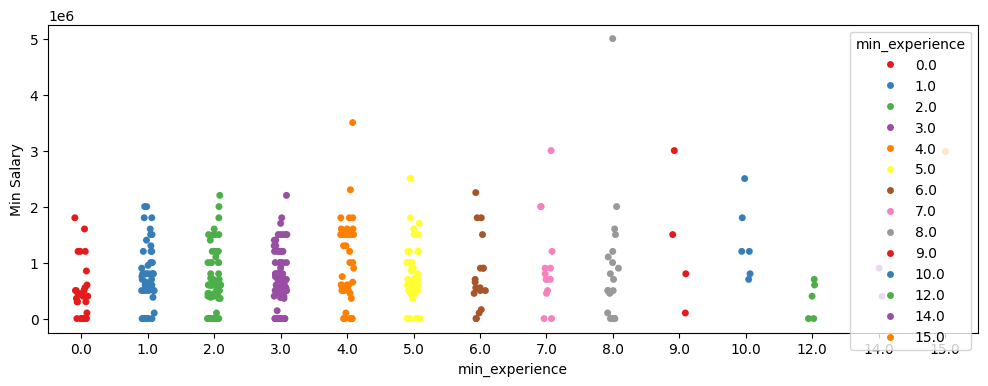

In [131]:
f,ax=plt.subplots(figsize=(12,4))

sns.stripplot(x='min_experience',y='Min Salary',data=df,jitter=True,hue="min_experience",palette="Set1")

<Axes: xlabel='min_experience', ylabel='Min Salary'>

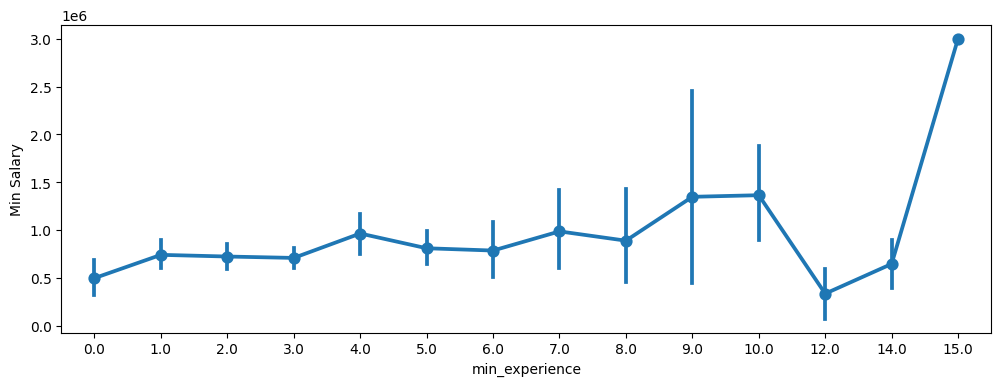

In [132]:
f,ax=plt.subplots(figsize=(12,4))
sns.pointplot(x='min_experience', y='Min Salary', data=df)

<Axes: xlabel='max_experience', ylabel='Max Salary'>

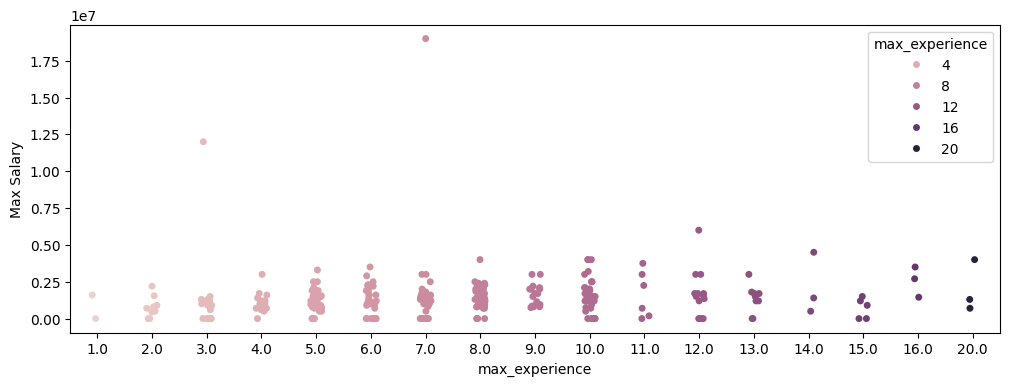

In [133]:
f,ax=plt.subplots(figsize=(12,4))
sns.stripplot(x='max_experience', y='Max Salary', data=df, jitter=True,hue="max_experience")

<Axes: xlabel='max_experience', ylabel='Max Salary'>

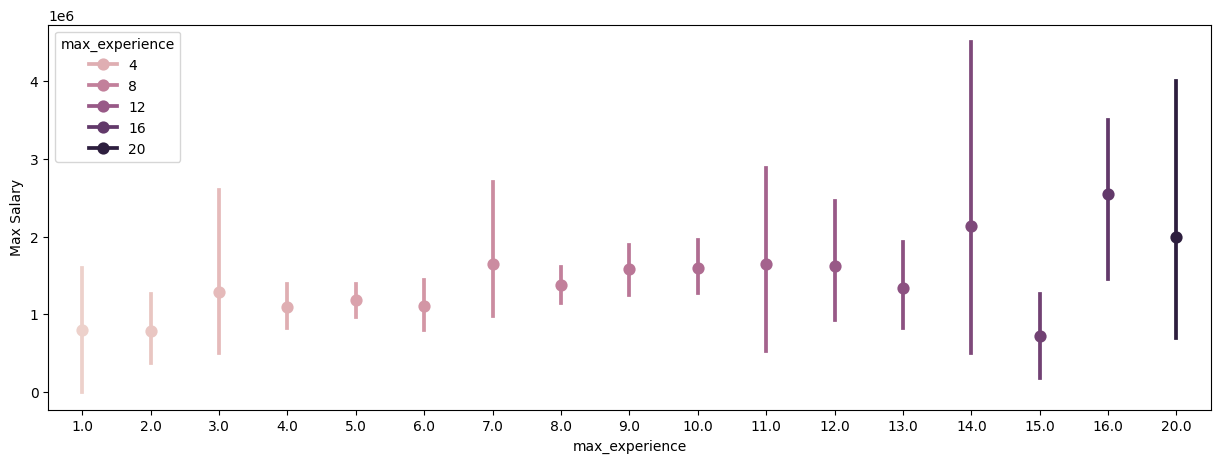

In [134]:
f,ax=plt.subplots(figsize=(15,5))
sns.pointplot(x='max_experience', y='Max Salary', data=df,hue="max_experience")

In [135]:
import plotly.graph_objs as go

# Ensure dfc is defined and contains the desired DataFrame
# ... code to define dfc ...

dfr = df['Role'].value_counts().head(20).sort_values(ascending = True).reset_index()
dfl = df['Location'].value_counts().head(20).sort_values(ascending = True).reset_index()

fig = go.Figure()

fig.add_trace(go.Bar(x = dfr['Role'],
                     y = dfr['count'],
                     orientation='h',
                     name = 'Position',
                     marker = dict(color = 'LightCoral')))

dfr['index'] = range(len(dfr))

fig.add_trace(go.Bar(x = dfr['Role'],
                     y = dfr['index'],
                     orientation='h',
                     name = 'Position',
                     marker = dict(color = 'LightCoral')))


fig.add_trace(go.Bar(x = dfr['count'], # Use dfc['Companies'] instead of dfr['Companies']
                     y = dfr['index'],
                     orientation='h',
                     name = 'Company',
                     marker = dict(color = 'SteelBlue')))

# ... rest of the code remains the same ...

fig.update_layout(
    updatemenus=[
        dict(
            type = "buttons",
            direction="left",
            pad={"r": 10, "t": 10},
            showactive=True,
            x=0.16,
            xanchor="left",
            y=1.12,
            yanchor="top",
            font = dict(color = 'Indigo',size = 14),
            buttons=list([
                dict(label="All",
                     method="update",
                     args=[ {"visible": [True, True, True]},
                            {'showlegend' : True}
                        ]),
                dict(label="Position",
                     method="update",
                     args=[ {"visible": [True, False, False]},
                            {'showlegend' : True}
                        ]),
                dict(label='Location',
                     method="update",
                     args=[ {"visible": [False, True, False]},
                            {'showlegend' : True}
                     ]),
                dict(label='Company',
                     method="update",
                     args=[ {"visible": [False, False, True]},
                            {'showlegend' : True}]),
            ]),
        )])

fig.update_layout(
    annotations=[
        dict(text="Choose:", showarrow=False,
             x=0, y=1.075, yref="paper", align="right",
             font=dict(size=16,color = 'DarkSlateBlue'))])

fig.update_layout(title ="Top 10 Positions, Locations and Companies",
                  title_x = 0.5,
                  title_font = dict(size = 20, color = 'MidnightBlue'))

fig.show()

In [136]:
dfd1 = df[df['Role']== 'Data Scientist']
dfd2 = df[df['Role']== 'Machine Learning Engineer']
dfd3 = df[df['Role']== 'Data Engineer']

redf1 = dfd1['Eligibility Criteria'].value_counts()[:15].reset_index()
redf2 = dfd2['Eligibility Criteria'].value_counts()[:15].reset_index()
redf3 = dfd3['Eligibility Criteria'].value_counts()[:15].reset_index()



fig = go.Figure()

# Use the index of the DataFrame as the x-axis values for the bar chart
fig.add_trace(go.Bar(x = redf1.index,
                     y = redf1["Eligibility Criteria"],
                     marker = dict(color = 'LightCoral'),
                     name = 'Data Scientist'))

fig.add_trace(go.Bar(x = redf2.index,
                     y = redf2['Eligibility Criteria'],
                     name = 'Machine Learning Engineer',
                     marker = dict(color = 'CadetBlue')))

fig.add_trace(go.Bar(x = redf3.index,
                     y = redf3['Eligibility Criteria'],
                     name = 'Data Engineer',
                     marker = dict(color = 'SteelBlue')))


fig.update_layout(
    updatemenus=[
        dict(
            direction="down",
            pad={"r": 10, "t": 10},
            showactive=True,
            x=0.13,
            xanchor="left",
            y=1.12,
            yanchor="top",
            font = dict(color = 'Indigo',size = 14),
            buttons=list([
                dict(label="All",
                     method="update",
                     args=[ {"visible": [True, True, True,True]},
                            {'showlegend' : True}
                        ]),
                dict(label="Data Scientist",
                     method="update",
                     args=[ {"visible": [True, False, False,False]},
                            {'showlegend' : True}
                        ]),
                dict(label='Machine Learning Engineer',
                     method="update",
                     args=[ {"visible": [False, True, False,False]},
                            {'showlegend' : True}
                     ]),
                dict(label='Data Engineer',
                     method="update",
                     args=[ {"visible": [False, False, True,False]},
                            {'showlegend' : True}
                        ]),

            ]),
        )])

fig.update_layout(
    annotations=[
        dict(text="Choose:", showarrow=False,
             x=0, y=1.075, yref="paper", align="right",
             font=dict(size=16,color = 'DarkSlateBlue'))])

fig.update_layout(title ="The distribution of states by four Positions",
                  title_x = 0.5,
                  title_font = dict(size = 20, color = 'MidnightBlue'))

fig.show()

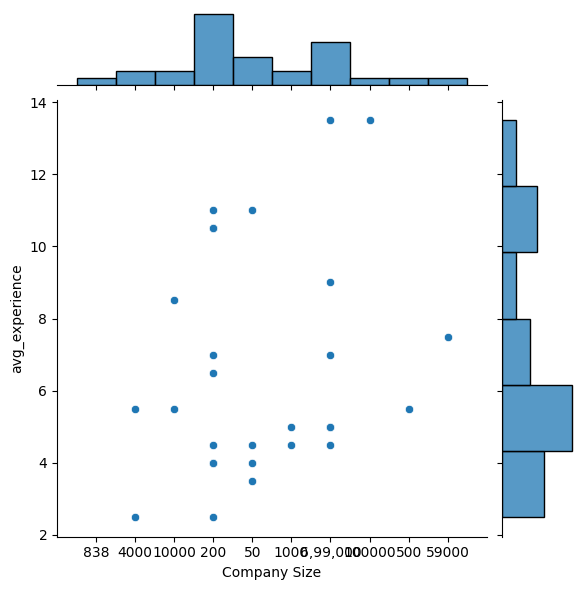

In [137]:
sns.jointplot(x= 'Company Size',y= 'avg_experience', data =df.head(30))

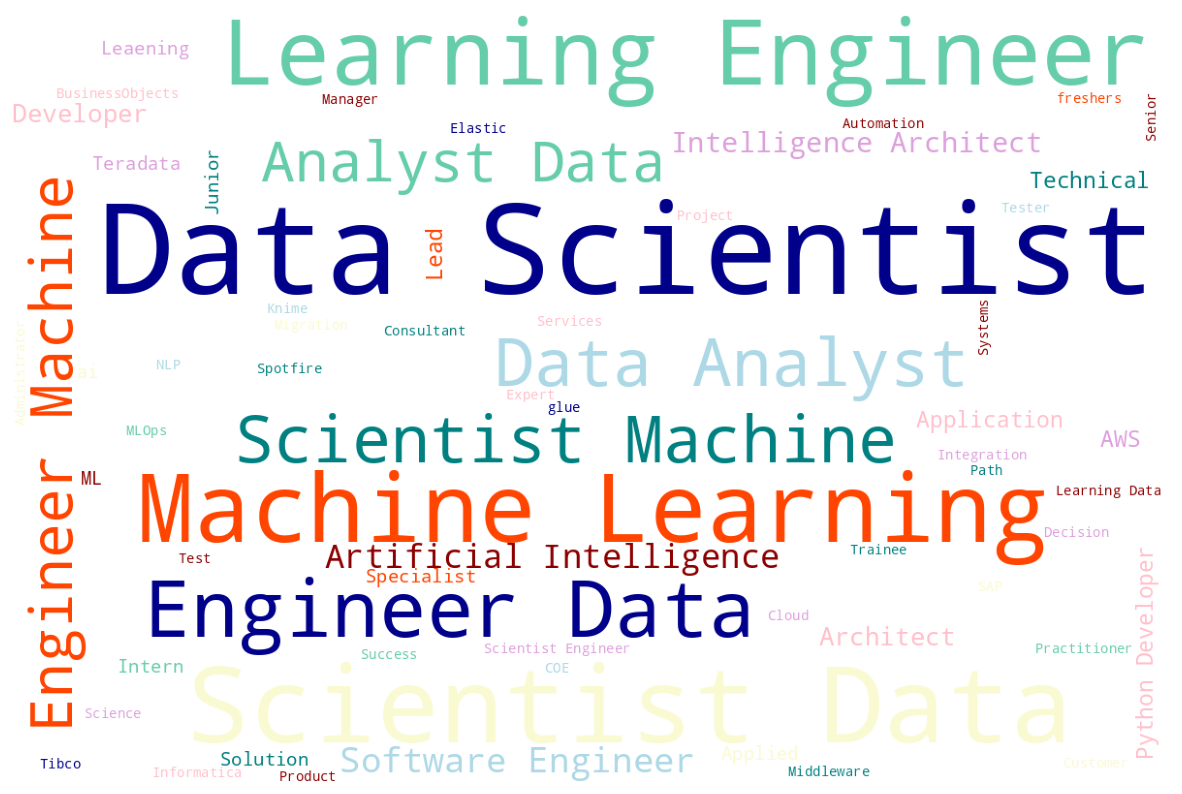

In [138]:
from wordcloud import WordCloud
from matplotlib import colors

color_list=  ['DarkBlue','Teal','LightBlue','MediumAquamarine','Plum','OrangeRed','DarkRed','Pink','LightGoldenrodYellow']

colormap = colors.ListedColormap(color_list)

plt.rcParams['figure.figsize'] = (15,15)

wordcloud =  WordCloud(background_color= 'white',
                       width = 1200,height = 800 ,
                       max_words = 120,colormap = colormap ).generate(" ".join(df['Role']))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [139]:
df3= df[["Location","Role"]].groupby("Location").count()
df3

,Role
Location,
Ahmedabad,5
Bengaluru,98
"Bengaluru, Delhi",1
"Bengaluru, Mumbai",1
"Bengaluru,Hyderabad",1
...,...
"Pune,Chennai,Bengaluru",1
Remote,10
"Secunderabad,Hyderabad",1


In [140]:
df3=df3.sort_values("Role",ascending = False).head(6)

In [141]:
df3

,Role
Location,
Bengaluru,98
Chennai,58
Hyderabad,28
Gurgaon,20
Mumbai,20
Noida,20


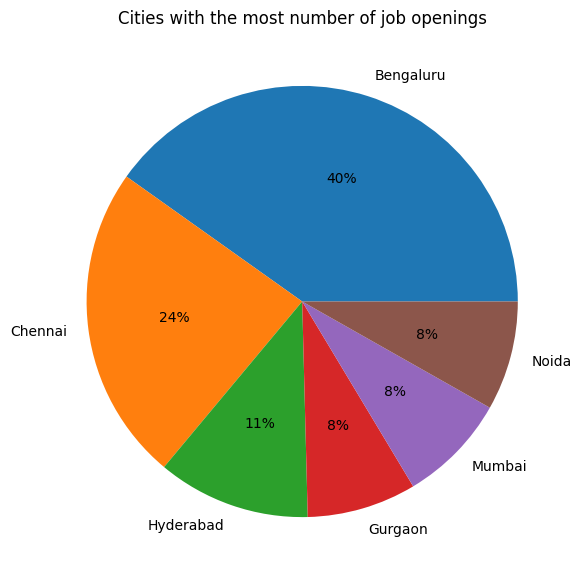

In [142]:
plt.figure(figsize=(10,7))
plt.title('Cities with the most number of job openings')
plt.pie(x=df3.Role,labels=df3.index,autopct='%1.0f%%')
plt.show()


In [143]:
df4= df[["Companies","Role"]].groupby("Companies").count()

In [144]:
df4

,Role
Companies,
2Coms,2
2Coms Consulting Pvt Ltd.,2
3D India Staffing Research & Consulting Co India,1
3D India Staffing Research & Consulting Pvt Ltd,1
3D India Staffing Research Consulting Pvt Ltd,4
...,...
YALLAS TECHNOLOGY SOLUTIONS (OPC) Pvt Ltd,1
Zoho,1
iKomet Technology Solutions,1


In [145]:
df4=df4.sort_values("Role",ascending = False).head(10)
df4

,Role
Companies,
Analytics Vidhya Educon Pvt. Ltd,24
Accenture,6
Wipro,6
Walmart,5
IBM,4
3D India Staffing Research Consulting Pvt Ltd,4
AgNext Technologies ( India's leading Agri Tech driven Company),3
Tech Mahindra,3
AICHUNKS Private Limited,3


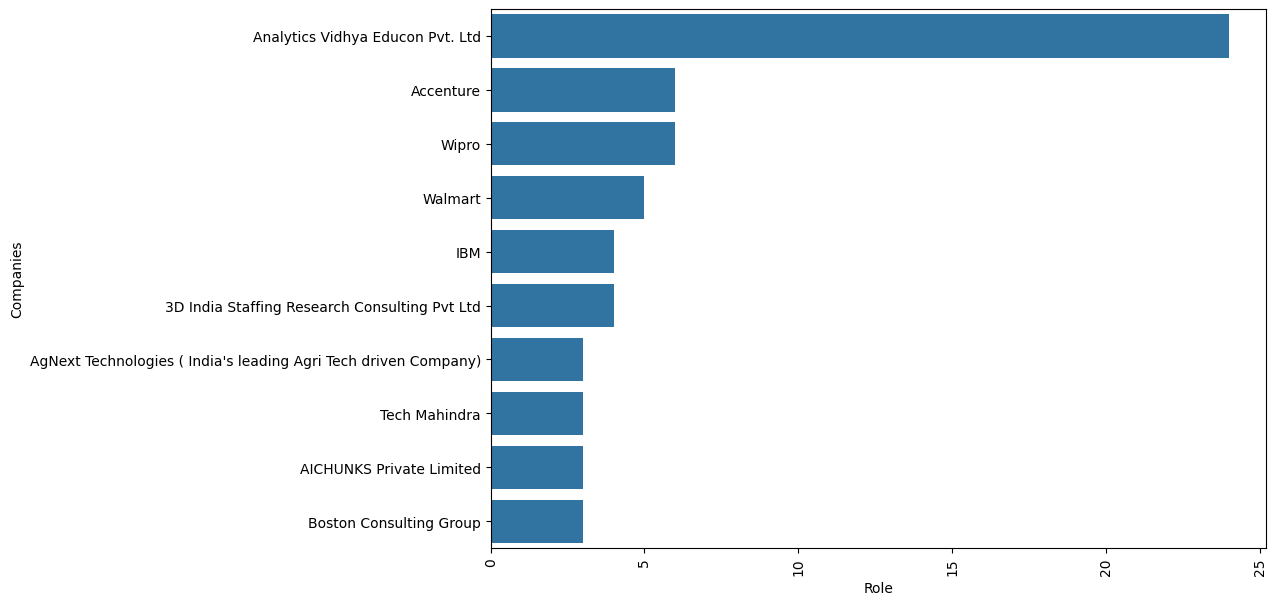

In [146]:
plt.figure(figsize=(10,7))
sns.barplot(y=df4.index,x=df4.Role)
plt.xticks(rotation=90)
plt.show()

In [147]:
a=df[df.Companies=='Analytics Vidhya Educon Pvt. Ltd']
a.Location.value_counts()

,count
Location,
Bengaluru,12
Noida,3
Mumbai,3
Pune,3
Chennai,2
Hyderabad,1


In [148]:
df5= df[["Role","Experience"]].groupby("Experience").count()
df5 = df5.sort_values("Role",ascending = False).head(7)
df5

,Role
Experience,
3-8 Yrs,29
5-10 Yrs,23
2-7 Yrs,22
3-6 Yrs,12
2-5 Yrs,12
4-9 Yrs,12
4-8 Yrs,11


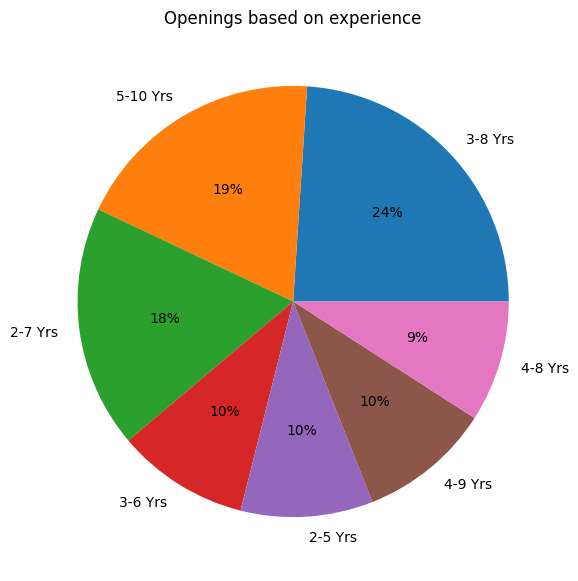

In [149]:
plt.figure(figsize=(10,7))
plt.title('Openings based on experience')
plt.pie(x=df5.Role,labels=df5.index,autopct='%1.0f%%')
plt.show()


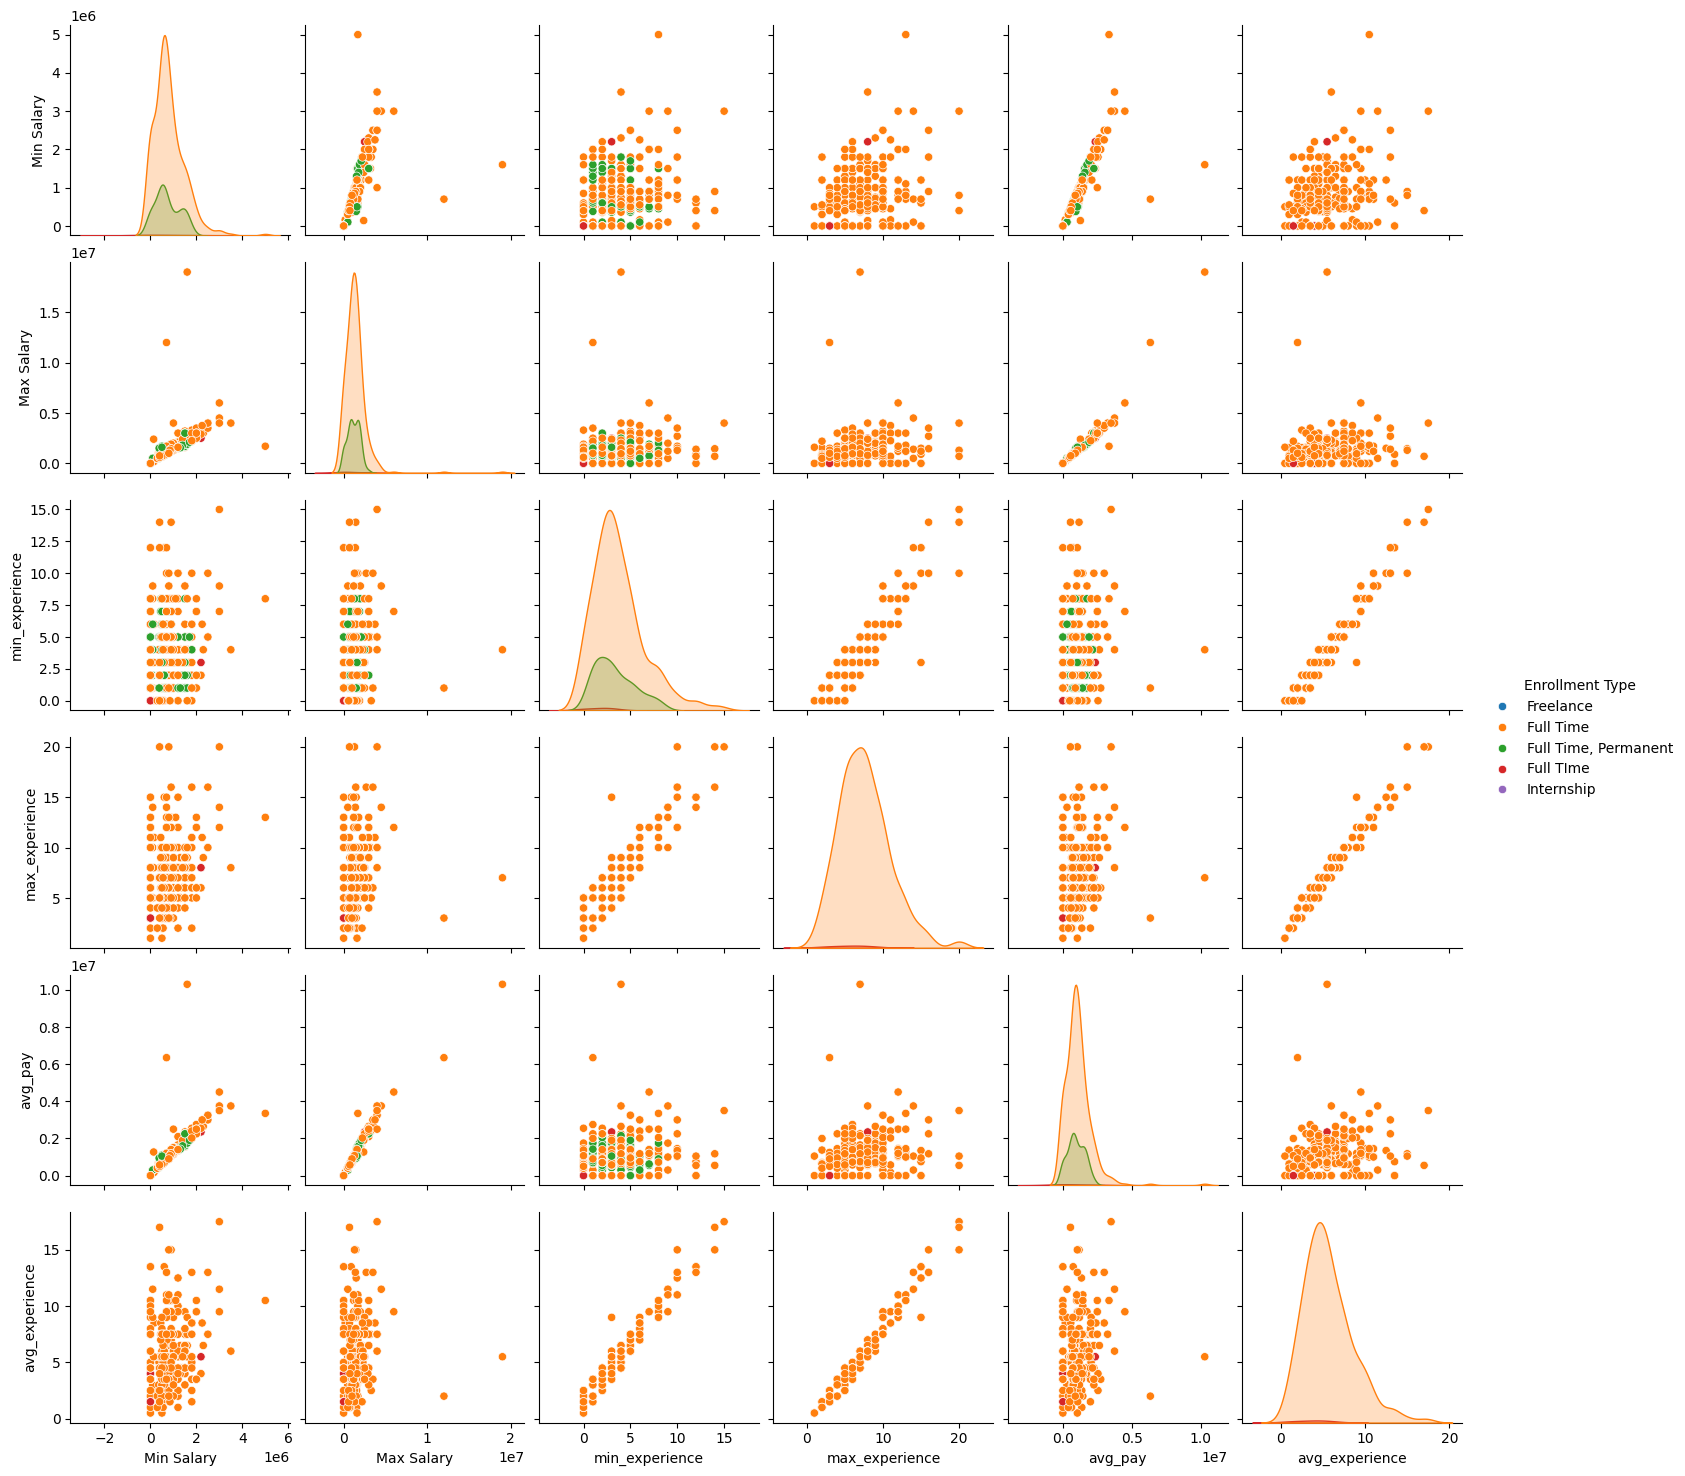

In [150]:
sns.pairplot(df,hue='Enrollment Type')

In [151]:
data1 = df.copy()
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Role                  388 non-null    object 
 1   Companies             388 non-null    object 
 2   Location              388 non-null    object 
 3   Experience            388 non-null    object 
 4   Skills                388 non-null    object 
 5   Company Size          388 non-null    object 
 6   Eligibility Criteria  388 non-null    object 
 7   Enrollment Type       388 non-null    object 
 8   Salary                388 non-null    object 
 9   Min Salary            388 non-null    int64  
 10  Max Salary            388 non-null    int64  
 11  min_experience        386 non-null    float64
 12  max_experience        303 non-null    float64
 13  avg_pay               388 non-null    float64
 14  avg_experience        303 non-null    float64
dtypes: float64(4), int64(2)

In [152]:
from sklearn.preprocessing import LabelEncoder
labelencoder_X = LabelEncoder()
for i in data1.columns:
    data1[i] = labelencoder_X.fit_transform(data1[i])
data1.head()

,Role,Companies,Location,Experience,Skills,Company Size,Eligibility Criteria,Enrollment Type,Salary,Min Salary,Max Salary,min_experience,max_experience,avg_pay,avg_experience
0,12,0,60,32,103,115,3,0,6,22,29,2,17,48,29
1,23,0,47,8,245,82,18,2,49,30,40,0,4,67,4
2,12,1,8,83,179,9,17,2,35,3,1,6,10,1,16
3,23,1,10,56,128,9,16,2,15,24,30,3,7,52,10
4,12,2,1,98,339,44,17,2,93,38,25,8,12,72,20


In [153]:
data1.describe()

,Role,Companies,Location,Experience,Skills,Company Size,Eligibility Criteria,Enrollment Type,Salary,Min Salary,Max Salary,min_experience,max_experience,avg_pay,avg_experience
count,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000
mean,15.391753,141.494845,26.654639,48.989691,185.461340,57.164948,14.878866,2.188144,59.997423,14.940722,16.827320,3.659794,8.811856,28.556701,14.301546
std,6.506696,90.756297,26.469607,26.626324,106.730776,33.881136,7.170372,0.435105,47.695551,10.046357,12.083627,2.651650,5.190745,21.437232,9.251820
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,12.000000,51.750000,1.000000,30.750000,95.750000,32.000000,14.000000,2.000000,12.000000,8.000000,7.000000,2.000000,5.000000,12.000000,7.000000
50%,12.000000,136.500000,18.000000,51.000000,184.500000,49.000000,18.000000,2.000000,61.500000,13.000000,16.000000,3.000000,7.000000,26.000000,11.000000
75%,23.000000,220.250000,47.000000,69.000000,277.250000,92.000000,20.000000,2.000000,104.000000,24.000000,25.000000,5.000000,13.000000,47.000000,22.000000
max,38.000000,299.000000,83.000000,101.000000,371.000000,116.000000,21.000000,4.000000,144.000000,38.000000,47.000000,14.000000,17.000000,77.000000,29.000000


In [154]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   Role                  388 non-null    int64
 1   Companies             388 non-null    int64
 2   Location              388 non-null    int64
 3   Experience            388 non-null    int64
 4   Skills                388 non-null    int64
 5   Company Size          388 non-null    int64
 6   Eligibility Criteria  388 non-null    int64
 7   Enrollment Type       388 non-null    int64
 8   Salary                388 non-null    int64
 9   Min Salary            388 non-null    int64
 10  Max Salary            388 non-null    int64
 11  min_experience        388 non-null    int64
 12  max_experience        388 non-null    int64
 13  avg_pay               388 non-null    int64
 14  avg_experience        388 non-null    int64
dtypes: int64(15)
memory usage: 45.6 KB


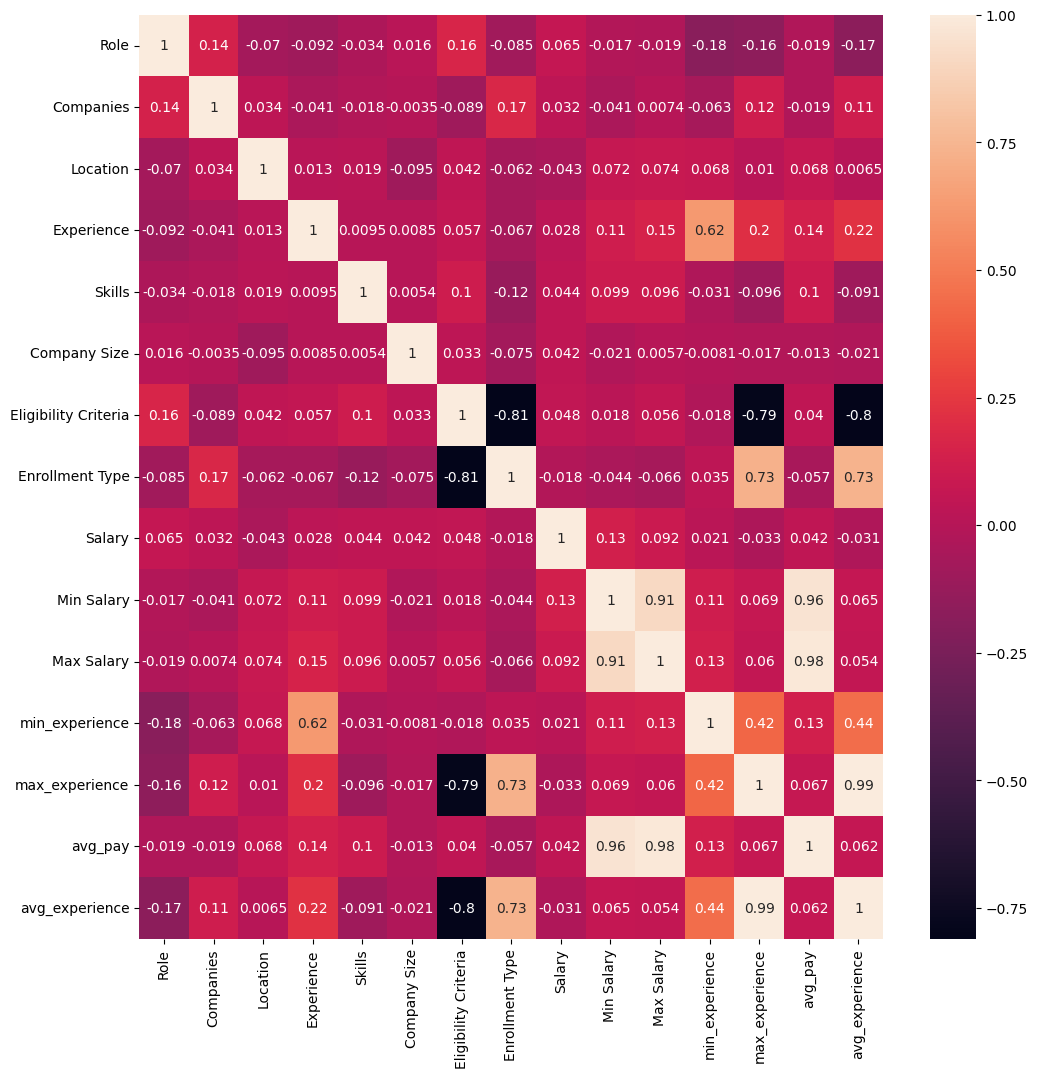

In [155]:
plt.figure(figsize=(12,12))
sns.heatmap(data1.corr(), annot=True)
plt.show()

In [156]:
from sklearn.preprocessing import StandardScaler
features = ['Role','Companies','Location','Experience','Skills','Company Size','Eligibility Criteria','Enrollment Type','Salary','Min Salary','Max Salary','min_experience', 'max_experience']
# Separating out the features
x = data1.loc[:, features].values
x = StandardScaler().fit_transform(x)

In [157]:
x

array([[-0.52194416, -1.56107667,  1.26138686, ...,  1.00867046,
        -0.62675575,  1.5794873 ],
       [ 1.17080484, -1.56107667,  0.76962343, ...,  1.92016856,
        -1.38197697, -0.92820358],
       [-0.52194416, -1.55004392, -0.70566688, ..., -1.31150652,
         0.88368668,  0.22919221],
       ...,
       [-0.52194416,  1.19710979,  1.71532234, ..., -0.31714496,
        -1.00436636, -1.31400218],
       [-0.52194416,  0.53514504, -0.32738732, ..., -1.39436999,
         0.12846546, -0.34950569],
       [-0.52194416, -0.2702454 , -0.40304323, ..., -0.73146228,
        -0.24914514, -0.92820358]])

In [158]:
from sklearn.decomposition import PCA
pca = PCA(n_components=13)
t = pca.fit_transform(x)
data2 = pd.DataFrame(t, columns=['PC1', 'PC2','PC3','PC4','Pc5','PC6', 'PC7','PC8','PC9','PC10','PC11','PC12','PC13'])
data2

,PC1,PC2,PC3,PC4,Pc5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13
0,-1.057532,1.254945,0.186153,1.367949,-1.402352,-1.502712,1.973416,1.263920,0.944325,-0.459969,-5.143641,0.151705,0.349618
1,-1.813528,1.176342,-2.537075,0.880080,-0.988059,-0.649324,0.484909,0.258431,1.730680,-0.128081,0.173078,0.087887,0.368222
2,0.050773,-0.539671,2.658435,0.691277,-0.334962,-0.207976,-1.529378,-0.913534,0.215509,0.200928,-0.214850,0.215852,-0.107082
3,-0.669565,0.989210,-0.467042,0.702786,-0.070996,-1.745084,-1.270939,-1.380567,0.997197,0.262121,-0.189532,0.004509,0.205581
4,0.386334,3.375219,1.034714,-0.213496,-1.338701,0.699253,-1.211016,-0.962216,0.430955,0.005930,-0.135349,-0.149201,-1.099277
...,...,...,...,...,...,...,...,...,...,...,...,...,...
383,-1.856185,-2.066623,-1.381226,-1.187674,-0.321904,1.115864,0.813752,-0.399698,-0.602900,-0.336978,0.039073,-0.366375,-0.150395
384,-1.384013,-1.937458,-0.719356,-0.569152,-1.353172,0.372458,0.853974,0.627462,-1.272027,-0.216057,-0.013445,-0.000460,-0.241650
385,-1.375850,-0.502512,-1.319245,0.610234,1.294570,0.648035,-0.156836,2.140075,-0.941632,-0.034586,0.110758,-0.480462,-0.311775
386,-0.338760,-1.663011,1.891232,-0.448279,0.105480,-1.237230,1.243436,0.129463,-0.899899,0.313515,-0.009760,0.022289,-0.062930


In [159]:
df_13=df.iloc[:,:13]
df_13.head(3)

,Role,Companies,Location,Experience,Skills,Company Size,Eligibility Criteria,Enrollment Type,Salary,Min Salary,Max Salary,min_experience,max_experience
0,Data Scientist,2Coms,New Delhi,2 - 7 years,DataModeling\nEnterpriseApplications\nAnalytic...,838,B.Tech,Freelance,1000000-2000000,1000000,2000000,2.0,NaN
1,Machine Learning Engineer,2Coms,Mumbai,0-5 Yrs,Python\nComputerVision\nMachineLearning\nR\nBu...,4000,UG,Full Time,1800000-3300000,1800000,3300000,0.0,5.0
2,Data Scientist,2Coms Consulting Pvt Ltd.,"Chennai, Bengaluru",6-11 Yrs,Machine Learning Code DataScience R Data Model...,10000,Phd,Full Time,160000-185000,160000,185000,6.0,11.0


In [160]:
# correlation coefficient between original variables and the component

loadings = pca.components_
num_pc = pca.n_features_
pc_list = ["PC"+str(i) for i in list(range(1, num_pc+1))]
loadings_df = pd.DataFrame.from_dict(dict(zip(pc_list, loadings)))
loadings_df['variable'] = df_13.columns.values
loadings_df = loadings_df.set_index('variable')
loadings_df

AttributeError: 'PCA' object has no attribute 'n_features_'

In [ ]:
#Correlation matrix plot for loadings
plt.rcParams['figure.figsize'] = (15,15)
ax = sns.heatmap(loadings_df, annot=True, cmap='Spectral')
plt.show()

In [ ]:
import plotly.express as px
features2 = ['Role','Companies','Location','Experience','Skills','Company Size','Eligibility Criteria','Enrollment Type','Salary','Min Salary','Max Salary','min_experience', 'max_experience' ]
y1 = data1.loc[:, features2].values
pca2 = PCA(n_components=2)
components = pca2.fit_transform(y1)
fig = px.scatter(components, x=0, y=1, color=1,labels={'0': 'PC1', '1': 'PC2'})
fig.show()

In [ ]:
#Segment Extration
f,ax=plt.subplots(figsize=(15,5))
df['Role'].value_counts().head(10).plot(kind = 'bar')

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt

linked = linkage(data2, 'complete')

#labelList = range(1, 11)

plt.figure(figsize=(12, 9))
dendrogram(linked, orientation='top')
plt.show()

In [ ]:
PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

In [ ]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,8))
visualizer.fit(t)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

In [ ]:
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=0).fit(t)
df['cluster_num'] = kmeans.labels_ #adding to df
print (kmeans.labels_) #Label assigned for each data point
print (kmeans.inertia_) #gives within-cluster sum of squares.
print(kmeans.n_iter_) #number of iterations that k-means algorithm runs to get a minimum within-cluster sum of squares
print(kmeans.cluster_centers_) #Location of the centroids on each cluster.

In [ ]:
#To see each cluster size
from collections import Counter
Counter(kmeans.labels_)

In [ ]:
#Visulazing clusters
sns.scatterplot(data=data2, x="PC1", y="PC11", hue=kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],
            marker="X", c="r", s=80, label="centroids")
plt.legend()
plt.show()


In [ ]:
X=data2[['PC1', 'PC2','PC3','PC4','Pc5','PC6', 'PC7','PC8','PC12','PC13']]
y=df['avg_pay']

In [ ]:
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.4, random_state=101)

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lm=LinearRegression().fit(X_train,y_train)

In [ ]:
print(lm.intercept_)

In [ ]:
lm.coef_

In [ ]:
X_train.columns

In [ ]:
cdf=pd.DataFrame(lm.coef_, X.columns, columns=['Coeff'])

In [ ]:
cdf

In [ ]:
predictions=lm.predict(X_test)
predictions

In [ ]:
y_test

In [ ]:
plt.scatter(y_test, predictions)

In [ ]:
sns.distplot((y_test-predictions))

In [ ]:
from sklearn import metrics
print('MAE:',metrics.mean_absolute_error(y_test,predictions))
print('MSE:',metrics.mean_squared_error(y_test,predictions))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,predictions)))

In [ ]:
metrics.mean_absolute_error(y_test,predictions)

In [ ]:
metrics.mean_squared_error(y_test,predictions)

In [ ]:
np.sqrt(metrics.mean_squared_error(y_test,predictions))